In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

In [19]:
from main.data_tools.extract_ntuples import get_pd, get_np
from main.draw_tools.stacking_with_error_bars import MC_stack_plot, MC_stack_plot_density

from main.data_tools.error_bars import make_data_weight
from main.data_tools.query_dataframes import cut_dfs_7types

# D+ -> eta pi+, pipipi

In [7]:
file_name = '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15ri_generic/MC15ri_etaetapip_tight_v2_240419_Kp_BCS_etapi0const/topo/resultfile/result_etapip_pipipi/*.root'

file_name = '/share/storage/jykim/storage_ghi/Ntuples_ghi_2/MC15ri_generic/MC15ri_etaetapip_tight_v2_240419_Kp_BCS_etapi0const/topo/resultfile/result_etapip_pipipi/*.root'
# file_name = '/home/jykim/ntuple_10e5.root'

base_filter = 'Dp_M'

tree = 'etapip_pipipi'
variables = ["__experiment__", "__run__", "__event__",\
             'Dp_M','Dp_chiProb','Dp_isSignal','Dp_CMS_p','Dp_cosAngleBetweenMomentumAndVertexVector','Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane',\
             'Dp_acos_cosAngleBetweenMomentumAndVertexVector','Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane',\
             'etapip_Eta_M','etapip_Eta_isSignal','etapip_Eta_p','etapip_Eta_genMotherPDG',\
             'etapip_pi0_gamma1_p','etapip_pi0_gamma2_p','etapip_pi0_gamma1_clusterNHits','etapip_pi0_gamma2_clusterNHits',\
             'etapip_pi0_gamma1_clusterReg', 'etapip_pi0_gamma2_clusterReg',\
             'eta_Pi0_M',"eta_Pi0_daughterAngle_0_1","eta_Pi0_daughterDiffOfPhi_0_1","eta_Pi0_Easym",\
             'eta_Pip_pionID','eta_Pim_pionID',\
             'eta_Pip_pionIDNN','eta_Pim_pionIDNN','eta_Pip_mcPDG','eta_Pim_mcPDG',\
             'Pip_pionID','Pip_pionIDNN','Pip_mcPDG','Pip_dr','Pip_dz','Pip_p','Pip_pt','etapip_pipipi_rank','Pip_charge','Pip_genMotherPDG',\
             'iProdBrP_Dsp_0','iProdBrP_Dp_0','iCascDcyBrP_Dp_0','iCascDcyBrCcP_Dp_0','iCascDcyBrP_Dsp_0','iCascDcyBrCcP_Dsp_0']
generic_variables = ["__experiment__", "__run__", "__event__",\
             'Dp_M','Dp_chiProb','Dp_isSignal','Dp_CMS_p','Dp_cosAngleBetweenMomentumAndVertexVector','Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane',\
             'Dp_acos_cosAngleBetweenMomentumAndVertexVector','Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane',\
             'etapip_Eta_M','etapip_Eta_isSignal','etapip_Eta_p','etapip_Eta_genMotherPDG',\
             'etapip_pi0_gamma1_p','etapip_pi0_gamma2_p','etapip_pi0_gamma1_clusterNHits','etapip_pi0_gamma2_clusterNHits',\
             'etapip_pi0_gamma1_clusterReg', 'etapip_pi0_gamma2_clusterReg',\
             'eta_Pi0_M',"eta_Pi0_daughterAngle_0_1","eta_Pi0_daughterDiffOfPhi_0_1","eta_Pi0_Easym",\
             'eta_Pip_pionID','eta_Pim_pionID',\
             'eta_Pip_pionIDNN','eta_Pim_pionIDNN','eta_Pip_mcPDG','eta_Pim_mcPDG',\
             'Pip_pionID','Pip_pionIDNN','Pip_mcPDG','Pip_dr','Pip_dz','Pip_p','Pip_pt','etapip_pipipi_rank','Pip_charge','Pip_genMotherPDG',]

In [4]:
pd_df_v0 = get_pd(file=file_name, tree=tree,base_filter=base_filter,variables=variables)

In [5]:
# cut = "etapip_pipipi_rank==1 & Dp_chiProb>0.01"
cut = "etapip_pipipi_rank==1"

# cut = "Dp_M>0"

pd_df_test=pd_df_v0.query(cut)

# pd_df_test=pd_df_test.query("etapip_pipipi_rank==1")

pd_df_test

,__experiment__,__run__,__event__,Dp_M,Dp_chiProb,Dp_isSignal,Dp_CMS_p,Dp_cosAngleBetweenMomentumAndVertexVector,Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane,Dp_acos_cosAngleBetweenMomentumAndVertexVector,...,Pip_pt,etapip_pipipi_rank,Pip_charge,Pip_genMotherPDG,iProdBrP_Dsp_0,iProdBrP_Dp_0,iCascDcyBrP_Dp_0,iCascDcyBrCcP_Dp_0,iCascDcyBrP_Dsp_0,iCascDcyBrCcP_Dsp_0
0,1003,0,39600298,1.870283,0.075506,1.0,2.589439,-0.518969,0.999999,2.116440,...,0.433120,1.0,1.0,411.0,-1,0,0,1,-1,-1
1,1003,0,18741812,1.603145,0.472808,NaN,2.581690,0.907091,0.999151,0.434476,...,0.104963,1.0,1.0,0.0,-1,-1,-1,-1,-1,0
2,1003,0,18743463,1.721134,0.099119,0.0,4.014325,0.830628,0.998549,0.590561,...,1.608162,1.0,1.0,-421.0,-1,-1,-1,-1,-1,-1
3,1003,0,18743640,1.644120,0.144708,0.0,3.418915,-0.486508,0.997585,2.078885,...,1.483692,1.0,-1.0,-431.0,-1,-1,-1,-1,-1,1
4,1003,0,38760566,1.759243,0.046125,0.0,2.634924,0.398079,0.999824,1.161374,...,1.539075,1.0,1.0,421.0,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562384,1003,0,180379450,1.629409,0.044452,0.0,3.111319,0.704005,0.999980,0.789775,...,1.292618,1.0,-1.0,-431.0,-1,-1,-1,-1,-1,6
562385,1003,0,180382265,1.906003,0.132456,0.0,2.745411,0.880292,1.000000,0.494319,...,0.787330,1.0,1.0,411.0,-1,0,5,-1,-1,-1
562386,1003,0,172496768,1.979412,0.075075,NaN,3.028596,-0.764584,0.995216,2.441192,...,0.663137,1.0,-1.0,-421.0,-1,0,12,-1,-1,-1
562387,1003,0,172496877,1.973463,0.005539,0.0,3.146815,0.762580,0.999042,0.703504,...,1.126588,1.0,1.0,431.0,1,-1,-1,65,4,-1


496470


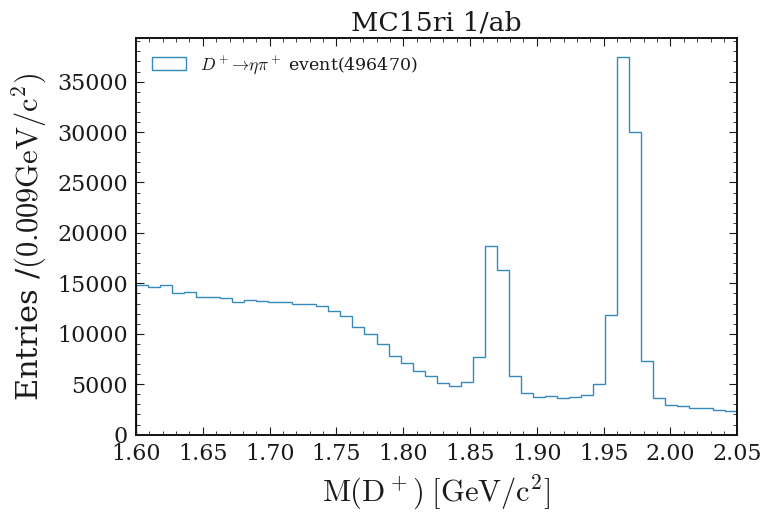

In [43]:
fig = plt.figure()
ax = fig.subplots()
xrange = (1.6,2.05,51)

xm = np.linspace(*xrange)

df = pd_df_test
# df2 = pd_df_test2

N_df = len(df)
# N_df2 = len(df2)

plt.hist(df["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ event(' + str(N_df) +')');
# plt.hist(df2["D0_M"],bins=xm,histtype='step',label=r'$D^0 \to K^- \pi^+ \gamma_F$ MC matched(' + str(N_df2) +')');

plt.legend(loc="upper left",fontsize=12.5)
ax.set_title(r'MC15ri 1/ab' )

n, xe = np.histogram(df["Dp_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{M(D^+)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.xlim(xrange[0],xrange[1])
plt.tight_layout()
# file1_name="/media/jykim/T7/saved_plots/DRAW/antiKstargamma/MC15ri_D0_M_FSR.png"
# plt.savefig(file1_name)
print(len(df))

In [8]:
file_name_uubar = '/share/storage/jykim/storage_ghi/Ntuples_ghi_2/MC15ri_generic/MC15ri_etaetapip_tight_v2_240419_Kp_BCS_etapi0const/uubar/*.root'
pd_df_v0_uubar = get_pd(file=file_name_uubar, tree=tree,base_filter=base_filter,variables=generic_variables)
pd_df_uubar=pd_df_v0_uubar.query(cut)

In [11]:
file_name_ddbar = '/share/storage/jykim/storage_ghi/Ntuples_ghi_2/MC15ri_generic/MC15ri_etaetapip_tight_v2_240419_Kp_BCS_etapi0const/ddbar/*.root'
pd_df_v0_ddbar = get_pd(file=file_name_ddbar, tree=tree,base_filter=base_filter,variables=generic_variables)
pd_df_ddbar=pd_df_v0_ddbar.query(cut)

In [12]:
file_name_ssbar = '/share/storage/jykim/storage_ghi/Ntuples_ghi_2/MC15ri_generic/MC15ri_etaetapip_tight_v2_240419_Kp_BCS_etapi0const/ssbar/*.root'
pd_df_v0_ssbar = get_pd(file=file_name_ssbar, tree=tree,base_filter=base_filter,variables=generic_variables)
pd_df_ssbar=pd_df_v0_ssbar.query(cut)

In [13]:
file_name_charged = '/share/storage/jykim/storage_ghi/Ntuples_ghi_2/MC15ri_generic/MC15ri_etaetapip_tight_v2_240419_Kp_BCS_etapi0const/charged/*.root'
pd_df_v0_charged = get_pd(file=file_name_charged, tree=tree,base_filter=base_filter,variables=generic_variables)
pd_df_charged=pd_df_v0_charged.query(cut)

In [14]:
file_name_mixed = '/share/storage/jykim/storage_ghi/Ntuples_ghi_2/MC15ri_generic/MC15ri_etaetapip_tight_v2_240419_Kp_BCS_etapi0const/mixed/*.root'
pd_df_v0_mixed = get_pd(file=file_name_mixed, tree=tree,base_filter=base_filter,variables=generic_variables)
pd_df_mixed=pd_df_v0_mixed.query(cut)

In [ ]:
file_name_taupair = '/share/storage/jykim/storage_ghi/Ntuples_ghi_2/MC15ri_generic/MC15ri_etaetapip_tight_v2_240419_Kp_BCS_etapi0const/taupair/*.root'
pd_df_v0_taupair = get_pd(file=file_name_taupair, tree=tree,base_filter=base_filter,variables=generic_variables)
pd_df_taupair=pd_df_v0_taupair.query(cut)

In [ ]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']
var = 'Dp_M'
data  = [pd_df_taupair[var], pd_df_mixed[var], pd_df_charged[var],pd_df_ssbar[var], pd_df_ddbar[var],pd_df_uubar[var], pd_df_test[var]]  
scale = 1
xrange = (1.6,2.05)
# xrange = (1.8,1.9)

nbins = 100
xlabel = "$\mathrm{M(D^+)}$"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="GeV/c^2")

496470


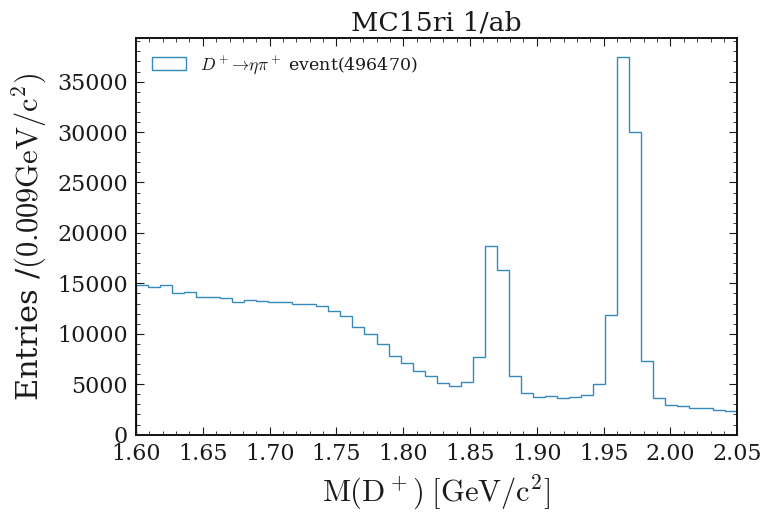

In [43]:
fig = plt.figure()
ax = fig.subplots()
xrange = (1.6,2.05,51)

xm = np.linspace(*xrange)

df = pd_df_test
# df2 = pd_df_test2

N_df = len(df)
# N_df2 = len(df2)

plt.hist(df["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ event(' + str(N_df) +')');
# plt.hist(df2["D0_M"],bins=xm,histtype='step',label=r'$D^0 \to K^- \pi^+ \gamma_F$ MC matched(' + str(N_df2) +')');

plt.legend(loc="upper left",fontsize=12.5)
ax.set_title(r'MC15ri 1/ab' )

n, xe = np.histogram(df["Dp_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{M(D^+)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.xlim(xrange[0],xrange[1])
plt.tight_layout()
# file1_name="/media/jykim/T7/saved_plots/DRAW/antiKstargamma/MC15ri_D0_M_FSR.png"
# plt.savefig(file1_name)
print(len(df))

247822


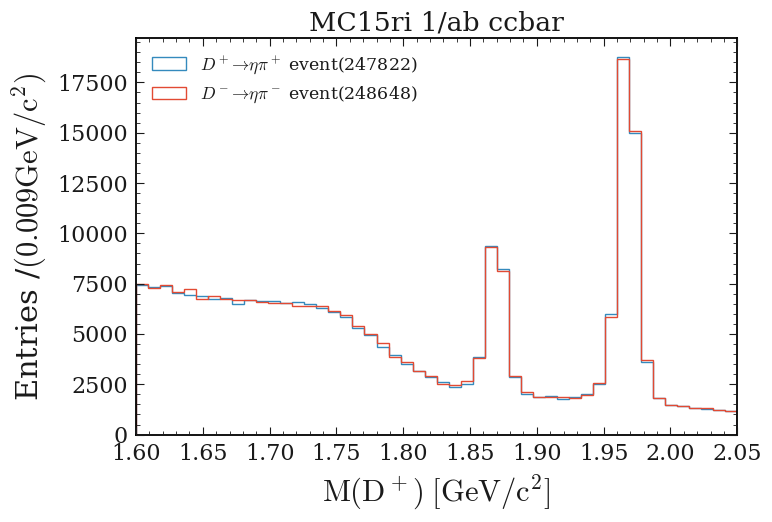

In [44]:
fig = plt.figure()
ax = fig.subplots()
xrange = (1.6,2.05,51)

xm = np.linspace(*xrange)t

df = pd_df_test.query('Pip_charge==1')
df2 = pd_df_test.query('Pip_charge==-1')

# df2 = pd_df_test2

N_df = len(df)
N_df2 = len(df2)

plt.hist(df["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ event(' + str(N_df) +')');
plt.hist(df2["Dp_M"],bins=xm,histtype='step',label=r'$D^- \to \eta \pi^-$ event(' + str(N_df2) +')');

plt.legend(loc="upper left",fontsize=12.5)
ax.set_title(r'MC15ri 1/ab ccbar' )

n, xe = np.histogram(df["Dp_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{M(D^+)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.xlim(xrange[0],xrange[1])
plt.tight_layout()
file1_name="/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_generic/pipipi/topo/MC15ri_etaetapip_tight_v2_Dp_M_compare_cc.png"
plt.savefig(file1_name)
print(len(df))

247822


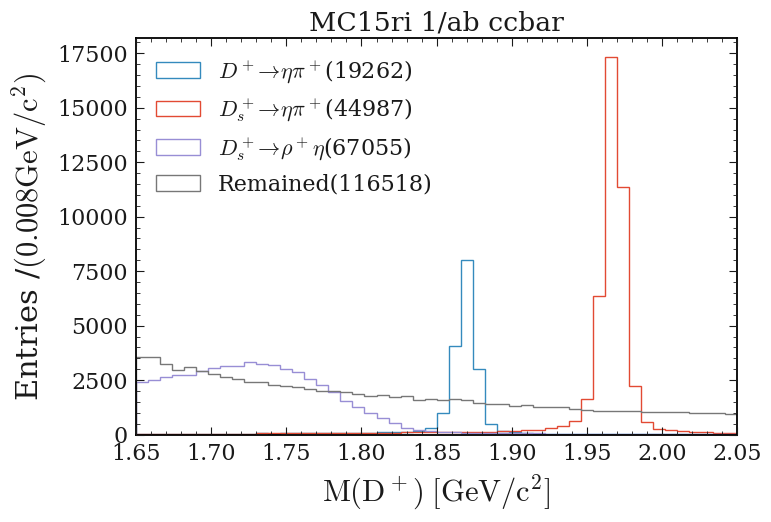

In [45]:
figure_size_inches = (8, 5.5)  # Width, Height
fig = plt.figure(figsize=figure_size_inches)
ax = fig.subplots()
xrange = (1.65,2.05,51)
# xrange = (1.76,1.95,51)

xm = np.linspace(*xrange)

cut1 = "Pip_charge==1 & iCascDcyBrP_Dp_0==0"
cut2 = "Pip_charge==1 & iCascDcyBrP_Dsp_0==4"
# cut3 = "Pip_charge==1 & iCascDcyBrP_Dsp_0==0 & abs(etapip_Eta_genMotherPDG)==431 & abs(Pip_genMotherPDG)==213"
cut3 = "Pip_charge==1 & iCascDcyBrP_Dsp_0==2"

# cut1 = "(iCascDcyBrP_Dp_0==0 | iCascDcyBrCcP_Dp_0==0) & (iCascDcyBrP_Dsp_0!=3 & iCascDcyBrCcP_Dsp_0!=3) & (iCascDcyBrP_Dsp_0!=5 & iCascDcyBrCcP_Dsp_0!=5)"
# cut2 = "(iCascDcyBrP_Dsp_0==3 | iCascDcyBrCcP_Dsp_0==3) & (iCascDcyBrP_Dp_0!=0 & iCascDcyBrCcP_Dp_0!=0) "
# cut3 = "(iCascDcyBrP_Dsp_0==5 | iCascDcyBrCcP_Dsp_0==5) & (iCascDcyBrP_Dp_0!=0 & iCascDcyBrCcP_Dp_0!=0)"

remained_cut = "Pip_charge==1 & \
                iCascDcyBrP_Dp_0!=0 & \
                iCascDcyBrP_Dsp_0!=4 & \
                iCascDcyBrP_Dsp_0!=2 "
df = pd_df_test.query(cut1)
df2 = pd_df_test.query(cut2)
df3 = pd_df_test.query(cut3)
df_rest = pd_df_test.query(remained_cut)


# df2 = pd_df_test.query("iCascDcyBrP_Dp_0!=0 & iCascDcyBrCcP_Dp_0!=0")

# df2 = pd_df_test2

N_df = len(df)
N_df2 = len(df2)
N_df3 = len(df3)
N_df_rest = len(df_rest)

plt.hist(df["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$(' + str(N_df) +')');
plt.hist(df2["Dp_M"],bins=xm,histtype='step',label=r'$D^+_s \to \eta \pi^+$(' + str(N_df2) +')');
plt.hist(df3["Dp_M"],bins=xm,histtype='step',label=r'$D^+_s \to \rho^+ \eta$(' + str(N_df3) +')');
plt.hist(df_rest["Dp_M"],bins=xm,histtype='step',label=r'Remained(' + str(N_df_rest) +')');

plt.legend(loc="upper right",fontsize=12.5)
ax.set_title(r'MC15ri 1/ab ccbar' )

n, xe = np.histogram(df["Dp_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{M(D^+)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.xlim(xrange[0],xrange[1])
plt.legend(loc="upper left")

plt.tight_layout()

file1_name="/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_generic/pipipi/topo/MC15ri_etaetapip_tight_v2_Dp_M.png"
plt.savefig(file1_name)
print(N_df+N_df2+N_df3+N_df_rest)

248648


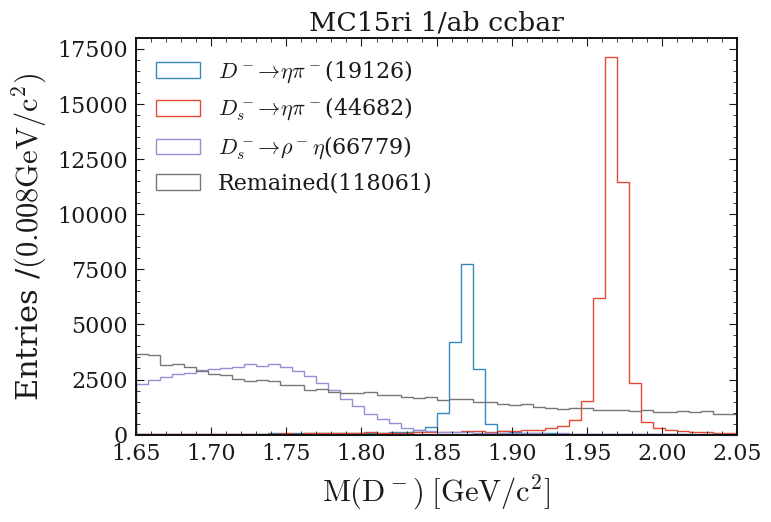

In [46]:
figure_size_inches = (8, 5.5)  # Width, Height
fig = plt.figure(figsize=figure_size_inches)
ax = fig.subplots()
xrange = (1.65,2.05,51)

xm = np.linspace(*xrange)

cut1 = "Pip_charge==-1 & iCascDcyBrCcP_Dp_0==0"
cut2 = "Pip_charge==-1 & iCascDcyBrCcP_Dsp_0==4"
cut3 = "Pip_charge==-1 & iCascDcyBrCcP_Dsp_0==2"

# cut1 = "(iCascDcyBrP_Dp_0==0 | iCascDcyBrCcP_Dp_0==0) & (iCascDcyBrP_Dsp_0!=3 & iCascDcyBrCcP_Dsp_0!=3) & (iCascDcyBrP_Dsp_0!=5 & iCascDcyBrCcP_Dsp_0!=5)"
# cut2 = "(iCascDcyBrP_Dsp_0==3 | iCascDcyBrCcP_Dsp_0==3) & (iCascDcyBrP_Dp_0!=0 & iCascDcyBrCcP_Dp_0!=0) "
# cut3 = "(iCascDcyBrP_Dsp_0==5 | iCascDcyBrCcP_Dsp_0==5) & (iCascDcyBrP_Dp_0!=0 & iCascDcyBrCcP_Dp_0!=0)"

remained_cut = "Pip_charge==-1 & \
                iCascDcyBrCcP_Dp_0!=0 & \
                iCascDcyBrCcP_Dsp_0!=4 & \
                iCascDcyBrCcP_Dsp_0!=2 "
df = pd_df_test.query(cut1)
df2 = pd_df_test.query(cut2)
df3 = pd_df_test.query(cut3)
df_rest = pd_df_test.query(remained_cut)


# df2 = pd_df_test.query("iCascDcyBrP_Dp_0!=0 & iCascDcyBrCcP_Dp_0!=0")

# df2 = pd_df_test2

N_df = len(df)
N_df2 = len(df2)
N_df3 = len(df3)
N_df_rest = len(df_rest)

plt.hist(df["Dp_M"],bins=xm,histtype='step',label=r'$D^- \to \eta \pi^-$(' + str(N_df) +')');
plt.hist(df2["Dp_M"],bins=xm,histtype='step',label=r'$D^-_s \to \eta \pi^-$(' + str(N_df2) +')');
plt.hist(df3["Dp_M"],bins=xm,histtype='step',label=r'$D^-_s \to \rho^- \eta$(' + str(N_df3) +')');
plt.hist(df_rest["Dp_M"],bins=xm,histtype='step',label=r'Remained(' + str(N_df_rest) +')');

plt.legend(loc="upper right",fontsize=12.5)
ax.set_title(r'MC15ri 1/ab ccbar' )

n, xe = np.histogram(df["Dp_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{M(D^-)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.xlim(xrange[0],xrange[1])
plt.legend(loc="upper left")

plt.tight_layout()

file1_name="/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_generic/pipipi/topo/MC15ri_etaetapip_tight_v2_Dp_M_cc.png"
plt.savefig(file1_name)
print(N_df+N_df2+N_df3+N_df_rest)

247822


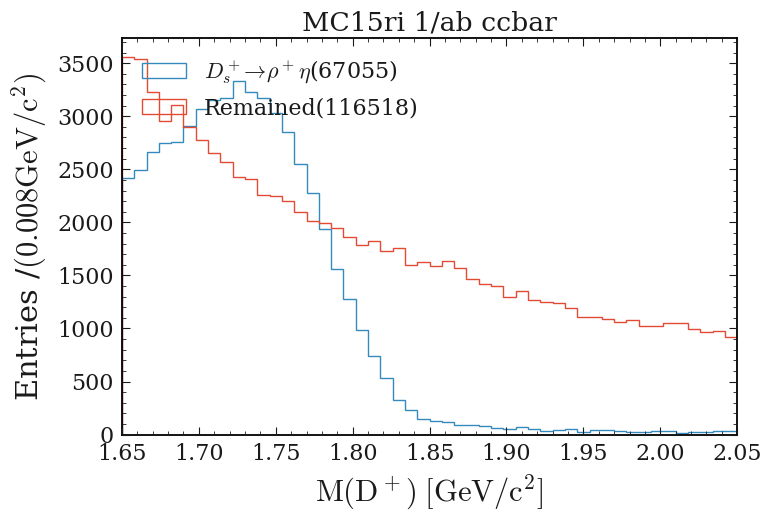

In [55]:
figure_size_inches = (8, 5.5)  # Width, Height
fig = plt.figure(figsize=figure_size_inches)
ax = fig.subplots()
xrange = (1.65,2.05,51)

xm = np.linspace(*xrange)

cut1 = "Pip_charge==1 & iCascDcyBrP_Dp_0==0"
cut2 = "Pip_charge==1 & iCascDcyBrP_Dsp_0==4"
cut3 = "Pip_charge==1 & iCascDcyBrP_Dsp_0==2"

# cut1 = "(iCascDcyBrP_Dp_0==0 | iCascDcyBrCcP_Dp_0==0) & (iCascDcyBrP_Dsp_0!=3 & iCascDcyBrCcP_Dsp_0!=3) & (iCascDcyBrP_Dsp_0!=5 & iCascDcyBrCcP_Dsp_0!=5)"
# cut2 = "(iCascDcyBrP_Dsp_0==3 | iCascDcyBrCcP_Dsp_0==3) & (iCascDcyBrP_Dp_0!=0 & iCascDcyBrCcP_Dp_0!=0) "
# cut3 = "(iCascDcyBrP_Dsp_0==5 | iCascDcyBrCcP_Dsp_0==5) & (iCascDcyBrP_Dp_0!=0 & iCascDcyBrCcP_Dp_0!=0)"

remained_cut = "Pip_charge==1 & \
                iCascDcyBrP_Dp_0!=0 & \
                iCascDcyBrP_Dsp_0!=4 & \
                iCascDcyBrP_Dsp_0!=2 "
df = pd_df_test.query(cut1)
df2 = pd_df_test.query(cut2)
df3 = pd_df_test.query(cut3)
df_rest = pd_df_test.query(remained_cut)


# df2 = pd_df_test.query("iCascDcyBrP_Dp_0!=0 & iCascDcyBrCcP_Dp_0!=0")

# df2 = pd_df_test2

N_df = len(df)
N_df2 = len(df2)
N_df3 = len(df3)
N_df_rest = len(df_rest)

# plt.hist(df["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$(' + str(N_df) +')');
# plt.hist(df2["Dp_M"],bins=xm,histtype='step',label=r'$D^+_s \to \eta \pi^+$(' + str(N_df2) +')');
plt.hist(df3["Dp_M"],bins=xm,histtype='step',label=r'$D^+_s \to \rho^+ \eta$(' + str(N_df3) +')');
plt.hist(df_rest["Dp_M"],bins=xm,histtype='step',label=r'Remained(' + str(N_df_rest) +')');

plt.legend(loc="upper right",fontsize=12.5)
ax.set_title(r'MC15ri 1/ab ccbar' )

n, xe = np.histogram(df["Dp_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{M(D^+)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.xlim(xrange[0],xrange[1])
plt.legend(loc="upper left")

plt.tight_layout()

file1_name="/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_generic/pipipi/topo/MC15ri_etaetapip_tight_v2_Dp_M_rhopeta_remain.png"
plt.savefig(file1_name)
print(N_df+N_df2+N_df3+N_df_rest)

232329


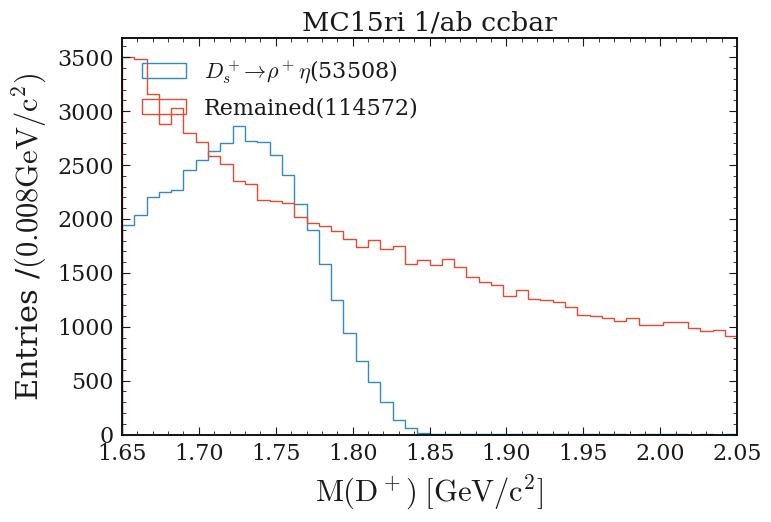

In [56]:
figure_size_inches = (8, 5.5)  # Width, Height
fig = plt.figure(figsize=figure_size_inches)
ax = fig.subplots()
xrange = (1.65,2.05,51)

xm = np.linspace(*xrange)

cut1 = "Pip_charge==1 & iCascDcyBrP_Dp_0==0"
cut2 = "Pip_charge==1 & iCascDcyBrP_Dsp_0==4"
cut3 = "Pip_charge==1 & iCascDcyBrP_Dsp_0==2 & abs(Pip_genMotherPDG)==213 & abs(etapip_Eta_genMotherPDG)==431"

# cut1 = "(iCascDcyBrP_Dp_0==0 | iCascDcyBrCcP_Dp_0==0) & (iCascDcyBrP_Dsp_0!=3 & iCascDcyBrCcP_Dsp_0!=3) & (iCascDcyBrP_Dsp_0!=5 & iCascDcyBrCcP_Dsp_0!=5)"
# cut2 = "(iCascDcyBrP_Dsp_0==3 | iCascDcyBrCcP_Dsp_0==3) & (iCascDcyBrP_Dp_0!=0 & iCascDcyBrCcP_Dp_0!=0) "
# cut3 = "(iCascDcyBrP_Dsp_0==5 | iCascDcyBrCcP_Dsp_0==5) & (iCascDcyBrP_Dp_0!=0 & iCascDcyBrCcP_Dp_0!=0)"

remained_cut = "Pip_charge==1 & \
                iCascDcyBrP_Dp_0!=0 & \
                iCascDcyBrP_Dsp_0!=4 & \
                iCascDcyBrP_Dsp_0!=2 &  (abs(Pip_genMotherPDG)!=213 | abs(etapip_Eta_genMotherPDG)!=431)"
df = pd_df_test.query(cut1)
df2 = pd_df_test.query(cut2)
df3 = pd_df_test.query(cut3)
df_rest = pd_df_test.query(remained_cut)


# df2 = pd_df_test.query("iCascDcyBrP_Dp_0!=0 & iCascDcyBrCcP_Dp_0!=0")

# df2 = pd_df_test2

N_df = len(df)
N_df2 = len(df2)
N_df3 = len(df3)
N_df_rest = len(df_rest)

# plt.hist(df["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$(' + str(N_df) +')');
# plt.hist(df2["Dp_M"],bins=xm,histtype='step',label=r'$D^+_s \to \eta \pi^+$(' + str(N_df2) +')');
plt.hist(df3["Dp_M"],bins=xm,histtype='step',label=r'$D^+_s \to \rho^+ \eta$(' + str(N_df3) +')');
plt.hist(df_rest["Dp_M"],bins=xm,histtype='step',label=r'Remained(' + str(N_df_rest) +')');

plt.legend(loc="upper right",fontsize=12.5)
ax.set_title(r'MC15ri 1/ab ccbar' )

n, xe = np.histogram(df["Dp_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{M(D^+)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.xlim(xrange[0],xrange[1])
plt.legend(loc="upper left")

plt.tight_layout()

# file1_name="/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_generic/pipipi/topo/MC15ri_etaetapip_tight_v2_Dp_M_rhopeta_remain_cc.png"
# plt.savefig(file1_name)
print(N_df+N_df2+N_df3+N_df_rest)

248648


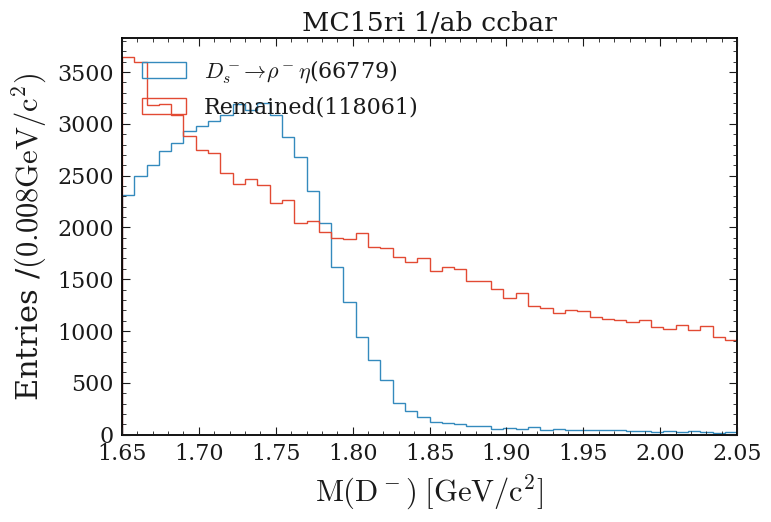

In [58]:
figure_size_inches = (8, 5.5)  # Width, Height
fig = plt.figure(figsize=figure_size_inches)
ax = fig.subplots()
xrange = (1.65,2.05,51)

xm = np.linspace(*xrange)

cut1 = "Pip_charge==-1 & iCascDcyBrCcP_Dp_0==0"
cut2 = "Pip_charge==-1 & iCascDcyBrCcP_Dsp_0==4"
cut3 = "Pip_charge==-1 & iCascDcyBrCcP_Dsp_0==2"

# cut1 = "(iCascDcyBrP_Dp_0==0 | iCascDcyBrCcP_Dp_0==0) & (iCascDcyBrP_Dsp_0!=3 & iCascDcyBrCcP_Dsp_0!=3) & (iCascDcyBrP_Dsp_0!=5 & iCascDcyBrCcP_Dsp_0!=5)"
# cut2 = "(iCascDcyBrP_Dsp_0==3 | iCascDcyBrCcP_Dsp_0==3) & (iCascDcyBrP_Dp_0!=0 & iCascDcyBrCcP_Dp_0!=0) "
# cut3 = "(iCascDcyBrP_Dsp_0==5 | iCascDcyBrCcP_Dsp_0==5) & (iCascDcyBrP_Dp_0!=0 & iCascDcyBrCcP_Dp_0!=0)"

remained_cut = "Pip_charge==-1 & \
                iCascDcyBrCcP_Dp_0!=0 & \
                iCascDcyBrCcP_Dsp_0!=4 & \
                iCascDcyBrCcP_Dsp_0!=2 "
df = pd_df_test.query(cut1)
df2 = pd_df_test.query(cut2)
df3 = pd_df_test.query(cut3)
df_rest = pd_df_test.query(remained_cut)


# df2 = pd_df_test.query("iCascDcyBrP_Dp_0!=0 & iCascDcyBrCcP_Dp_0!=0")

# df2 = pd_df_test2

N_df = len(df)
N_df2 = len(df2)
N_df3 = len(df3)
N_df_rest = len(df_rest)

# plt.hist(df["Dp_M"],bins=xm,histtype='step',label=r'$D^- \to \eta \pi^-$(' + str(N_df) +')');
# plt.hist(df2["Dp_M"],bins=xm,histtype='step',label=r'$D^-_s \to \eta \pi^-$(' + str(N_df2) +')');
plt.hist(df3["Dp_M"],bins=xm,histtype='step',label=r'$D^-_s \to \rho^- \eta$(' + str(N_df3) +')');
plt.hist(df_rest["Dp_M"],bins=xm,histtype='step',label=r'Remained(' + str(N_df_rest) +')');

plt.legend(loc="upper right",fontsize=12.5)
ax.set_title(r'MC15ri 1/ab ccbar' )

n, xe = np.histogram(df["Dp_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{M(D^-)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.xlim(xrange[0],xrange[1])
plt.legend(loc="upper left")

plt.tight_layout()

file1_name="/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_generic/pipipi/topo/MC15ri_etaetapip_tight_v2_Dp_M_rhopeta_remain_cc.png"
plt.savefig(file1_name)
print(N_df+N_df2+N_df3+N_df_rest)

690892


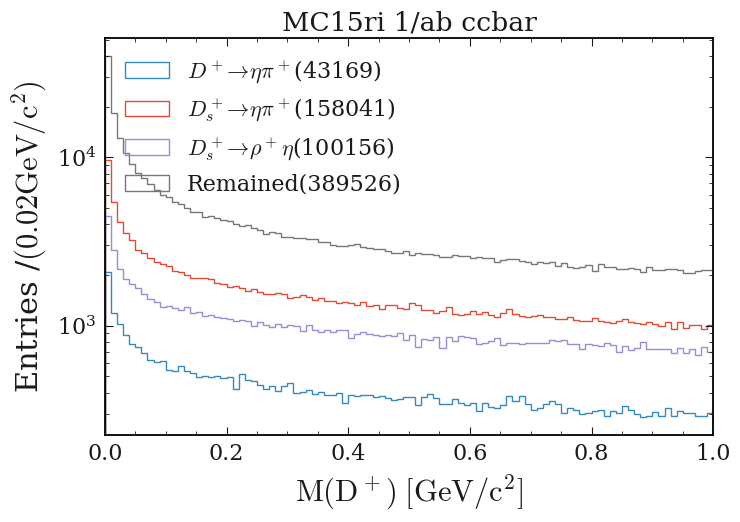

In [8]:
fig = plt.figure()
ax = fig.subplots()
xrange = (0,1,101)

xm = np.linspace(*xrange)

cut1 = "iCascDcyBrP_Dp_0==0 | iCascDcyBrCcP_Dp_0==0"
cut2 = "(iCascDcyBrP_Dsp_0==3 | iCascDcyBrCcP_Dsp_0==3) & (iCascDcyBrP_Dp_0!=0 & iCascDcyBrCcP_Dp_0!=0) "
cut3 = "(iCascDcyBrP_Dsp_0==5 | iCascDcyBrCcP_Dsp_0==5) & (iCascDcyBrP_Dp_0!=0 & iCascDcyBrCcP_Dp_0!=0)"

remained_cut = "iCascDcyBrP_Dp_0!=0 & iCascDcyBrCcP_Dp_0!=0 & \
                iCascDcyBrP_Dsp_0!=3 & iCascDcyBrCcP_Dsp_0!=3 & \
                iCascDcyBrP_Dsp_0!=5 & iCascDcyBrCcP_Dsp_0!=5"
df = pd_df_test.query(cut1)
df2 = pd_df_test.query(cut2)
df3 = pd_df_test.query(cut3)
df_rest = pd_df_test.query(remained_cut)


# df2 = pd_df_test.query("iCascDcyBrP_Dp_0!=0 & iCascDcyBrCcP_Dp_0!=0")

# df2 = pd_df_test2

N_df = len(df)
N_df2 = len(df2)
N_df3 = len(df3)
N_df_rest = len(df_rest)

value = "Dp_chiProb"
plt.hist(df[value],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$(' + str(N_df) +')' );
plt.hist(df2[value],bins=xm,histtype='step',label=r'$D^+_s \to \eta \pi^+$(' + str(N_df2) +')' );
plt.hist(df3[value],bins=xm,histtype='step',label=r'$D^+_s \to \rho^+ \eta$(' + str(N_df3) +')');
plt.hist(df_rest[value],bins=xm,histtype='step',label=r'Remained(' + str(N_df_rest) +')');

plt.legend(loc="upper right",fontsize=12.5)
ax.set_title(r'MC15ri 1/ab ccbar' )

n, xe = np.histogram(df["Dp_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{M(D^+)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.xlim(xrange[0],xrange[1])
plt.legend(loc="upper left")

plt.tight_layout()
plt.yscale('log')
# file1_name="/media/jykim/T7/saved_plots/DRAW/antiKstargamma/MC15ri_D0_M_FSR.png"
# plt.savefig(file1_name)
print(N_df+N_df2+N_df3+N_df_rest)

# D+ -> eta pi+,gg

In [27]:
file_name = '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15ri_generic/MC15ri_etaetapip_tight_v2_240419_Kp_BCS_etapi0const/topo/resultfile/result_etapip_gg/*.root'
# file_name = '/home/jykim/ntuple_10e5.root'
file_name = '/share/storage/jykim/storage_ghi/Ntuples_ghi_2/MC15ri_generic/MC15ri_etaetapip_tight_v2_240419_Kp_BCS_etapi0const/topo/resultfile/result_etapip_gg/*.root'

base_filter = 'Dp_M'

tree = 'etapip_gg'
variables = ["__experiment__", "__run__", "__event__",\
             'Dp_M','Dp_chiProb','Dp_isSignal','Dp_CMS_p','Dp_cosAngleBetweenMomentumAndVertexVector','Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane',\
             'Dp_acos_cosAngleBetweenMomentumAndVertexVector','Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane',\
             'etapip_Eta_M','etapip_Eta_isSignal','etapip_Eta_daughterDiffOfPhi_0_1','etapip_Eta_daughterAngle_0_1','etapip_Eta_Easym','etapip_Eta_p',\
             'etapip_gamma1_p','etapip_gamma2_p','etapip_gamma1_clusterNHits','etapip_gamma2_clusterNHits',\
             'etapip_gamma1_clusterReg', 'etapip_gamma2_clusterReg',\
             'Pip_pionID','Pip_pionIDNN','Pip_mcPDG','Pip_dr','Pip_dr','Pip_p','Pip_charge',\
             'ROE_Mgg','dM_pi0','ROE_Mgg_50MeV','dM_pi0_50MeV','ROE_Mgg_75MeV','dM_pi0_75MeV','ROE_Mgg_mask','dM_pi0_mask',\
             'ROE_Mgg_2','dM_pi0_2','ROE_Mgg_50MeV_2','dM_pi0_50MeV_2','ROE_Mgg_75MeV_2','dM_pi0_75MeV_2','ROE_Mgg_mask_2','dM_pi0_mask_2',\
             'veto_isSignal','veto_isSignal_50MeV','veto_isSignal_75MeV','veto_isSignal_mask','etapip_gg_rank',\
             'iCascDcyBrP_Dp_0', 'iCascDcyBrCcP_Dp_0','iCascDcyBrP_Dsp_0','iCascDcyBrCcP_Dsp_0']
generic_variables = ["__experiment__", "__run__", "__event__",\
             'Dp_M','Dp_chiProb','Dp_isSignal','Dp_CMS_p','Dp_cosAngleBetweenMomentumAndVertexVector','Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane',\
             'Dp_acos_cosAngleBetweenMomentumAndVertexVector','Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane',\
             'etapip_Eta_M','etapip_Eta_isSignal','etapip_Eta_daughterDiffOfPhi_0_1','etapip_Eta_daughterAngle_0_1','etapip_Eta_Easym','etapip_Eta_p',\
             'etapip_gamma1_p','etapip_gamma2_p','etapip_gamma1_clusterNHits','etapip_gamma2_clusterNHits',\
             'etapip_gamma1_clusterReg', 'etapip_gamma2_clusterReg',\
             'Pip_pionID','Pip_pionIDNN','Pip_mcPDG','Pip_dr','Pip_dr','Pip_p','Pip_charge',\
             'ROE_Mgg','dM_pi0','ROE_Mgg_50MeV','dM_pi0_50MeV','ROE_Mgg_75MeV','dM_pi0_75MeV','ROE_Mgg_mask','dM_pi0_mask',\
             'ROE_Mgg_2','dM_pi0_2','ROE_Mgg_50MeV_2','dM_pi0_50MeV_2','ROE_Mgg_75MeV_2','dM_pi0_75MeV_2','ROE_Mgg_mask_2','dM_pi0_mask_2',\
             'veto_isSignal','veto_isSignal_50MeV','veto_isSignal_75MeV','veto_isSignal_mask','etapip_gg_rank',]

In [23]:
pd_df_v0_gg = get_pd(file=file_name, tree=tree,base_filter=base_filter,variables=variables)

In [24]:
# cut = "etapip_pipipi_rank==1 & Dp_chiProb>0.01"
cut = "etapip_gg_rank==1"

# cut = "Dp_M>0"

pd_df_test_gg=pd_df_v0_gg.query(cut)

# pd_df_test=pd_df_test.query("etapip_pipipi_rank==1")

pd_df_test_gg

,__experiment__,__run__,__event__,Dp_M,Dp_chiProb,Dp_isSignal,Dp_CMS_p,Dp_cosAngleBetweenMomentumAndVertexVector,Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane,Dp_acos_cosAngleBetweenMomentumAndVertexVector,...,dM_pi0_mask_2,veto_isSignal,veto_isSignal_50MeV,veto_isSignal_75MeV,veto_isSignal_mask,etapip_gg_rank,iCascDcyBrP_Dp_0,iCascDcyBrCcP_Dp_0,iCascDcyBrP_Dsp_0,iCascDcyBrCcP_Dsp_0
0,1003,0,39597017,1.964095,0.465503,0.0,3.729469,0.880994,0.999998,0.492838,...,0.254296,0.0,0.0,0.0,0.0,1.0,0,-1,-1,0
1,1003,0,39599680,1.700870,0.134566,0.0,2.981240,0.565168,0.999587,0.970160,...,0.114100,NaN,NaN,0.0,NaN,1.0,-1,-1,1,2
2,1003,0,39599990,1.917501,0.473005,0.0,3.039830,-0.410788,0.997737,1.994114,...,0.341785,0.0,0.0,0.0,0.0,1.0,-1,-1,-1,-1
3,1003,0,39602706,1.723858,0.570768,0.0,2.762387,0.920744,0.999882,0.400813,...,1.964803,1.0,NaN,NaN,NaN,1.0,-1,-1,-1,-1
4,1003,0,39604581,1.676219,0.774468,0.0,3.698392,-0.433543,0.998744,2.019217,...,0.019105,NaN,0.0,0.0,0.0,1.0,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1372514,1003,0,172496506,1.705513,0.850548,NaN,2.531110,0.532053,0.999953,1.009773,...,0.330603,NaN,NaN,NaN,NaN,1.0,-1,-1,-1,-1
1372515,1003,0,172496677,1.760718,0.446299,0.0,3.532737,0.983538,0.999272,0.181702,...,0.019859,0.0,0.0,0.0,0.0,1.0,-1,31,1,-1
1372516,1003,0,172496909,1.602293,0.607970,NaN,2.551571,0.774217,0.999980,0.685319,...,0.015226,1.0,1.0,1.0,1.0,1.0,-1,14,126,-1
1372517,1003,0,172498884,1.653757,0.456415,NaN,2.532020,0.999879,1.000000,0.015570,...,0.010861,NaN,NaN,NaN,NaN,1.0,-1,-1,-1,-1


635456


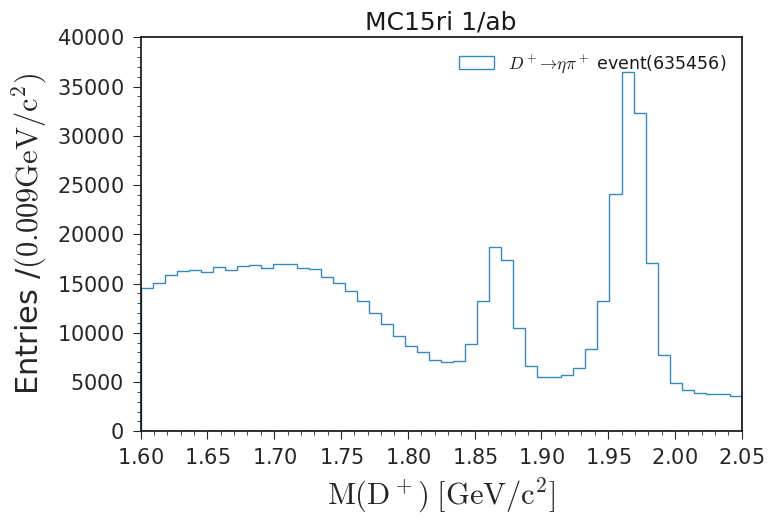

In [26]:
fig = plt.figure()
ax = fig.subplots()
xrange = (1.6,2.05,51)

xm = np.linspace(*xrange)

df = pd_df_test_gg.query('Pip_charge==1')
# df2 = pd_df_test2

N_df = len(df)
# N_df2 = len(df2)

plt.hist(df["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ event(' + str(N_df) +')');
# plt.hist(df2["D0_M"],bins=xm,histtype='step',label=r'$D^0 \to K^- \pi^+ \gamma_F$ MC matched(' + str(N_df2) +')');

plt.legend(loc="upper right",fontsize=12.5)
ax.set_title(r'MC15ri 1/ab' )

n, xe = np.histogram(df["Dp_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{M(D^+)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.xlim(xrange[0],xrange[1])
plt.tight_layout()
# file1_name="/media/jykim/T7/saved_plots/DRAW/antiKstargamma/MC15ri_D0_M_FSR.png"
# plt.savefig(file1_name)
print(len(df))

In [28]:
file_name_uubar_gg = '/share/storage/jykim/storage_ghi/Ntuples_ghi_2/MC15ri_generic/MC15ri_etaetapip_tight_v2_240419_Kp_BCS_etapi0const/uubar/*.root'
pd_df_v0_uubar_gg = get_pd(file=file_name_uubar_gg, tree=tree,base_filter=base_filter,variables=generic_variables)
pd_df_uubar_gg=pd_df_v0_uubar_gg.query(cut)

In [29]:
file_name_ddbar_gg = '/share/storage/jykim/storage_ghi/Ntuples_ghi_2/MC15ri_generic/MC15ri_etaetapip_tight_v2_240419_Kp_BCS_etapi0const/ddbar/*.root'
pd_df_v0_ddbar_gg = get_pd(file=file_name_ddbar_gg, tree=tree,base_filter=base_filter,variables=generic_variables)
pd_df_ddbar_gg=pd_df_v0_ddbar_gg.query(cut)

In [32]:
file_name_ssbar_gg = '/share/storage/jykim/storage_ghi/Ntuples_ghi_2/MC15ri_generic/MC15ri_etaetapip_tight_v2_240419_Kp_BCS_etapi0const/ssbar/*.root'
pd_df_v0_ssbar_gg = get_pd(file=file_name_ssbar_gg, tree=tree,base_filter=base_filter,variables=generic_variables)
pd_df_ssbar_gg=pd_df_v0_ssbar_gg.query(cut)

In [34]:
file_name_charged_gg = '/share/storage/jykim/storage_ghi/Ntuples_ghi_2/MC15ri_generic/MC15ri_etaetapip_tight_v2_240419_Kp_BCS_etapi0const/charged/*.root'
pd_df_v0_charged_gg = get_pd(file=file_name_charged_gg, tree=tree,base_filter=base_filter,variables=generic_variables)
pd_df_charged_gg=pd_df_v0_charged_gg.query(cut)

In [35]:
file_name_mixed_gg = '/share/storage/jykim/storage_ghi/Ntuples_ghi_2/MC15ri_generic/MC15ri_etaetapip_tight_v2_240419_Kp_BCS_etapi0const/mixed/*.root'
pd_df_v0_mixed_gg = get_pd(file=file_name_mixed_gg, tree=tree,base_filter=base_filter,variables=generic_variables)
pd_df_mixed_gg=pd_df_v0_mixed_gg.query(cut)

In [36]:
file_name_taupair_gg = '/share/storage/jykim/storage_ghi/Ntuples_ghi_2/MC15ri_generic/MC15ri_etaetapip_tight_v2_240419_Kp_BCS_etapi0const/taupair/*.root'
pd_df_v0_taupair_gg = get_pd(file=file_name_taupair_gg, tree=tree,base_filter=base_filter,variables=generic_variables)
pd_df_taupair_gg=pd_df_v0_taupair_gg.query(cut)

[38819. 38925. 39030. 38690. 38250. 37911. 37965. 38261. 38026. 37894.
 37504. 37366. 37151. 37219. 37066. 36967. 36609. 36039. 36120. 35317.
 35185. 34978. 34409. 33923. 33403. 33292. 32714. 32399. 31781. 31074.
 30336. 29659. 29523. 28593. 27945. 27433. 26784. 26510. 25560. 25154.
 25102. 24505. 24298. 23734. 23460. 23155. 23441. 23303. 23973. 24537.
 25828. 27922. 30292. 32668. 33900. 32758. 30581. 27248. 24574. 22756.
 21491. 20623. 20268. 20085. 19954. 20000. 19650. 19791. 20018. 20369.
 20438. 21158. 22520. 24158. 27104. 30647. 36172. 42013. 46376. 47953.
 44668. 38965. 31825. 26428. 22475. 19935. 18455. 17814. 17208. 17058.
 16784. 16549. 16540. 16125. 15842. 16000. 15918. 15792. 15733. 15595.]
fitst_bin_entries=38819.0


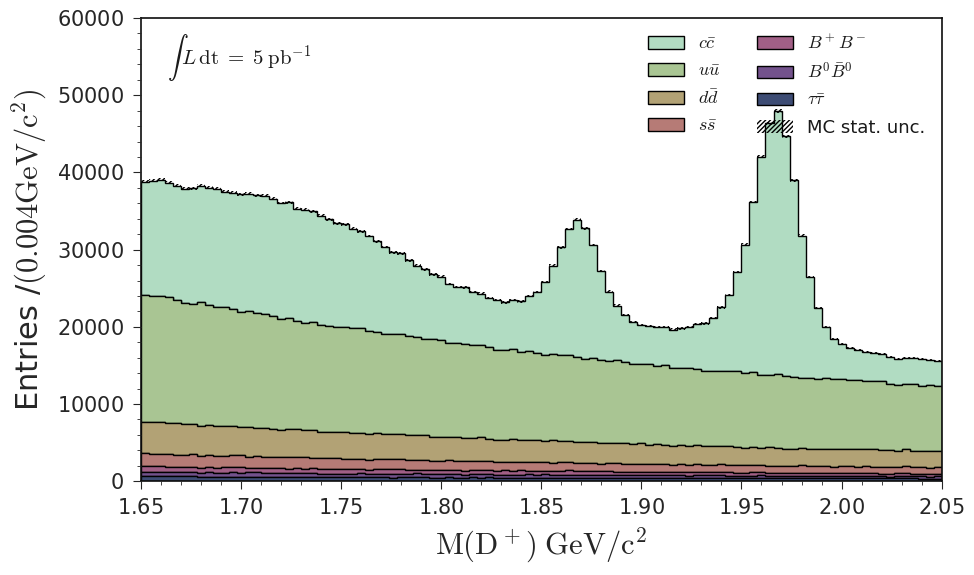

In [38]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']
var = 'Dp_M'
data  = [pd_df_taupair_gg[var], pd_df_mixed_gg[var], pd_df_charged_gg[var],pd_df_ssbar_gg[var], pd_df_ddbar_gg[var],pd_df_uubar_gg[var], pd_df_test_gg[var]]  
scale = 1
xrange = (1.65,2.05)
# xrange = (1.8,1.9)

nbins = 100
xlabel = "$\mathrm{M(D^+)}$"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="GeV/c^2")

647186


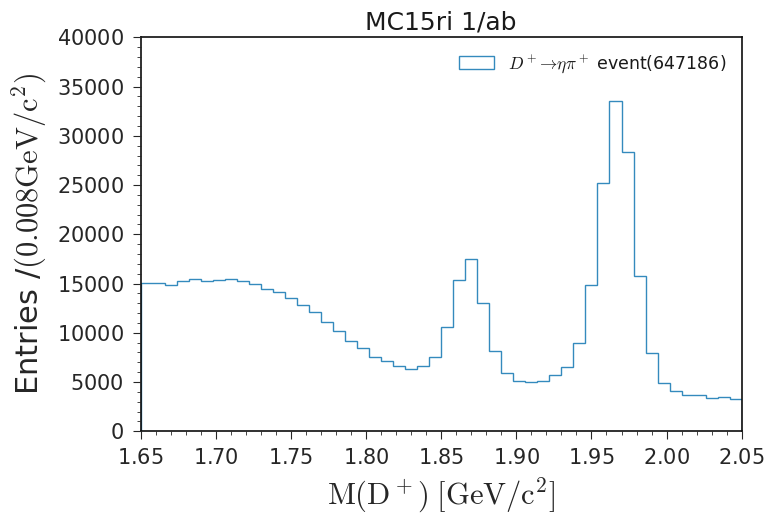

In [39]:
fig = plt.figure()
ax = fig.subplots()
xrange = (1.65,2.05,51)

xm = np.linspace(*xrange)

df = pd_df_test_gg.query('Pip_charge==-1')
# df2 = pd_df_test2

N_df = len(df)
# N_df2 = len(df2)

plt.hist(df["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ event(' + str(N_df) +')');
# plt.hist(df2["D0_M"],bins=xm,histtype='step',label=r'$D^0 \to K^- \pi^+ \gamma_F$ MC matched(' + str(N_df2) +')');

plt.legend(loc="upper right",fontsize=12.5)
ax.set_title(r'MC15ri 1/ab' )

n, xe = np.histogram(df["Dp_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{M(D^+)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.xlim(xrange[0],xrange[1])
plt.tight_layout()
# file1_name="/media/jykim/T7/saved_plots/DRAW/antiKstargamma/MC15ri_D0_M_FSR.png"
# plt.savefig(file1_name)
print(len(df))

1282642


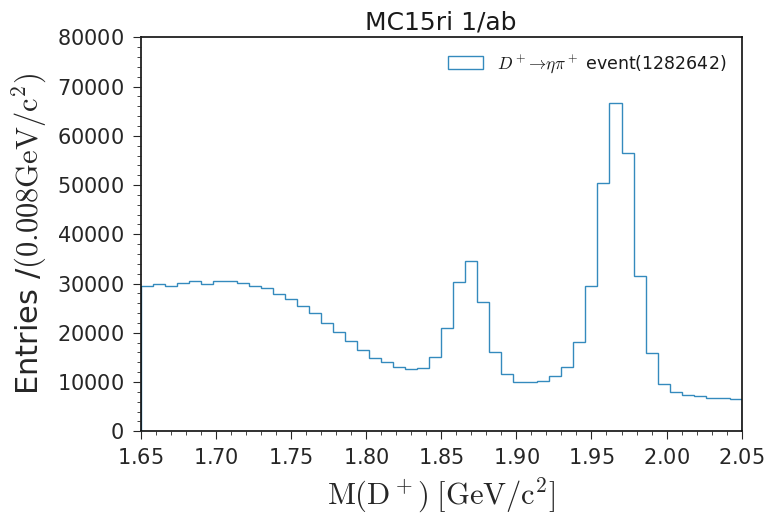

In [40]:
fig = plt.figure()
ax = fig.subplots()
xrange = (1.65,2.05,51)

xm = np.linspace(*xrange)

df = pd_df_test_gg
# df2 = pd_df_test2

N_df = len(df)
# N_df2 = len(df2)

plt.hist(df["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ event(' + str(N_df) +')');
# plt.hist(df2["D0_M"],bins=xm,histtype='step',label=r'$D^0 \to K^- \pi^+ \gamma_F$ MC matched(' + str(N_df2) +')');

plt.legend(loc="upper right",fontsize=12.5)
ax.set_title(r'MC15ri 1/ab' )

n, xe = np.histogram(df["Dp_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{M(D^+)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.xlim(xrange[0],xrange[1])
plt.tight_layout()
# file1_name="/media/jykim/T7/saved_plots/DRAW/antiKstargamma/MC15ri_D0_M_FSR.png"
# plt.savefig(file1_name)
print(len(df))

635456


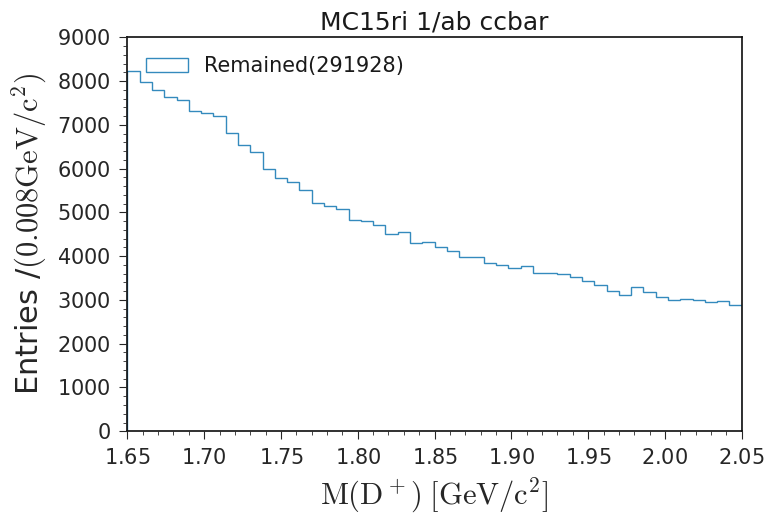

In [44]:
figure_size_inches = (8, 5.5)  # Width, Height
fig = plt.figure(figsize=figure_size_inches)
ax = fig.subplots()
xrange = (1.7,2.05,51)
xrange = (1.65,2.05,51)

xm = np.linspace(*xrange)

cut1 = "Pip_charge==1 & iCascDcyBrP_Dp_0==3"
cut2 = "Pip_charge==1 & iCascDcyBrP_Dsp_0==0"
cut3 = "Pip_charge==1 & iCascDcyBrP_Dsp_0==1"

remained_cut = "Pip_charge==1 & \
                iCascDcyBrP_Dp_0!=3 & \
                iCascDcyBrP_Dsp_0!=0 & \
                iCascDcyBrP_Dsp_0!=1 "
df = pd_df_test_gg.query(cut1)
df2 = pd_df_test_gg.query(cut2)
df3 = pd_df_test_gg.query(cut3)
df_rest = pd_df_test_gg.query(remained_cut)


# df2 = pd_df_test.query("iCascDcyBrP_Dp_0!=0 & iCascDcyBrCcP_Dp_0!=0")

# df2 = pd_df_test2

N_df = len(df)
N_df2 = len(df2)
N_df3 = len(df3)
N_df_rest = len(df_rest)

# plt.hist(df["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$(' + str(N_df) +')');
# plt.hist(df2["Dp_M"],bins=xm,histtype='step',label=r'$D^+_s \to \eta \pi^+$(' + str(N_df2) +')');
# plt.hist(df3["Dp_M"],bins=xm,histtype='step',label=r'$D^+_s \to \rho^+ \eta$(' + str(N_df3) +')');
plt.hist(df_rest["Dp_M"],bins=xm,histtype='step',label=r'Remained(' + str(N_df_rest) +')');

plt.legend(loc="upper right",fontsize=12.5)
ax.set_title(r'MC15ri 1/ab ccbar' )

n, xe = np.histogram(df["Dp_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{M(D^+)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.xlim(xrange[0],xrange[1])
plt.legend(loc="upper left")

plt.tight_layout()

file1_name="/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_generic/gg/topo/MC15ri_etaetapip_gg_tight_v2_Dp_M.png"
plt.savefig(file1_name)
print(N_df+N_df2+N_df3+N_df_rest)

In [57]:
import ROOT
import pandas as pd
import numpy as np
var="Dp_M"
# Assuming df_rest, pd_df_taupair_gg, pd_df_mixed_gg, pd_df_charged_gg, pd_df_ssbar_gg, pd_df_ddbar_gg, pd_df_uubar_gg are your pandas DataFrames
dfs = [
    df_rest[var].values, 
    pd_df_taupair_gg[var].values, 
    pd_df_mixed_gg[var].values, 
    pd_df_charged_gg[var].values, 
    pd_df_ssbar_gg[var].values, 
    pd_df_ddbar_gg[var].values, 
    pd_df_uubar_gg[var].values
]

# Combine all datasets into a single array
combined_data = np.concatenate(dfs)

# Create a RooRealVar object to represent the observable
dp_m = ROOT.RooRealVar("Dp_M", "Dp_M", min(combined_data), max(combined_data))

# Convert the numpy array to a RooDataSet
data_set = ROOT.RooDataSet("data", "data", ROOT.RooArgSet(dp_m))

for value in combined_data:
    dp_m.setVal(value)
    data_set.add(ROOT.RooArgSet(dp_m))

# Define the parameter of the exponential
# lambda_ = ROOT.RooRealVar("lambda", "slope of exponential", -0.1, -10, 0)

# Define the exponential PDF
# expo = ROOT.RooExponential("expo", "exponential PDF", dp_m, lambda_)

# Define the coefficients of the quadratic polynomial
a0 = ROOT.RooRealVar("a0", "coefficient of constant term", 0, -10, 10)
a1 = ROOT.RooRealVar("a1", "coefficient of linear term", 0, -10, 10)
a2 = ROOT.RooRealVar("a2", "coefficient of quadratic term", 0, -10, 10)

# Define the quadratic polynomial PDF
poly = ROOT.RooPolynomial("poly", "quadratic PDF", dp_m, ROOT.RooArgList(a0, a1))



# Set the fitting range, for example between 1800 and 1900
fitting_range_min = 1.65
fitting_range_max = 2.05
dp_m.setRange("fitRange", fitting_range_min, fitting_range_max)

# Fit the model to the data within the specified range
# result = expo.fitTo(data_set, ROOT.RooFit.Range("fitRange"), ROOT.RooFit.Save())
result = poly.fitTo(data_set, ROOT.RooFit.Range("fitRange"), ROOT.RooFit.Save())

# Create a frame for plotting
frame = dp_m.frame(ROOT.RooFit.Range(fitting_range_min, fitting_range_max))

# Plot the data
data_set.plotOn(frame)

# Plot the fit result
# expo.plotOn(frame)
poly.plotOn(frame)
# Draw the frame on a canvas
canvas = ROOT.TCanvas("canvas", "canvas", 800, 600)
frame.Draw()
canvas.SaveAs("fit_result.pdf")


[#1] INFO:Eval -- RooRealVar::setRange(Dp_M) new range named 'fitRange' created with bounds [1.65,2.05]
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_poly_data) constructing test statistic for sub-range named fitRange
[#1] INFO:Eval -- RooRealVar::setRange(Dp_M) new range named 'NormalizationRangeForfitRange' created with bounds [1.6,2.1]
[#1] INFO:Eval -- RooRealVar::setRange(Dp_M) new range named 'fit_nll_poly_data' created with bounds [1.65,2.05]
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_poly_data) fixing interpretation of coefficients of any RooAddPdf to full domain of observables 
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 a0           0.00000e+00  2.00000e+00   -1.00000e+01  1.00000e+01
     2 a1           0.00000e+00  2.00

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: pdf file fit_result.pdf has been created


In [58]:
import ROOT
import pandas as pd
import numpy as np
var="Dp_M"
# Assuming df_rest, pd_df_taupair_gg, pd_df_mixed_gg, pd_df_charged_gg, pd_df_ssbar_gg, pd_df_ddbar_gg, pd_df_uubar_gg are your pandas DataFrames
dfs = [
    df_rest[var].values, 
    pd_df_taupair_gg[var].values, 
    pd_df_mixed_gg[var].values, 
    pd_df_charged_gg[var].values, 
    pd_df_ssbar_gg[var].values, 
    pd_df_ddbar_gg[var].values, 
    pd_df_uubar_gg[var].values
]

# Combine all datasets into a single array
combined_data = np.concatenate(dfs)

# Create a RooRealVar object to represent the observable
dp_m = ROOT.RooRealVar("Dp_M", "Dp_M", min(combined_data), max(combined_data))

# Convert the numpy array to a RooDataSet
data_set = ROOT.RooDataSet("data", "data", ROOT.RooArgSet(dp_m))

for value in combined_data:
    dp_m.setVal(value)
    data_set.add(ROOT.RooArgSet(dp_m))

# Define the parameter of the exponential
# lambda_ = ROOT.RooRealVar("lambda", "slope of exponential", -0.1, -10, 0)

# Define the exponential PDF
expo = ROOT.RooExponential("expo", "exponential PDF", dp_m, lambda_)

# Define the coefficients of the quadratic polynomial
a0 = ROOT.RooRealVar("a0", "coefficient of constant term", 0, -10, 10)
a1 = ROOT.RooRealVar("a1", "coefficient of linear term", 0, -10, 10)
a2 = ROOT.RooRealVar("a2", "coefficient of quadratic term", 0, -10, 10)

# Define the quadratic polynomial PDF
# poly = ROOT.RooPolynomial("poly", "quadratic PDF", dp_m, ROOT.RooArgList(a0, a1))



# Set the fitting range, for example between 1800 and 1900
fitting_range_min = 1.65
fitting_range_max = 2.05
dp_m.setRange("fitRange", fitting_range_min, fitting_range_max)

# Fit the model to the data within the specified range
result = expo.fitTo(data_set, ROOT.RooFit.Range("fitRange"), ROOT.RooFit.Save())
# result = poly.fitTo(data_set, ROOT.RooFit.Range("fitRange"), ROOT.RooFit.Save())

# Create a frame for plotting
frame = dp_m.frame(ROOT.RooFit.Range(fitting_range_min, fitting_range_max))

# Plot the data
data_set.plotOn(frame)

# Plot the fit result
expo.plotOn(frame)
# poly.plotOn(frame)
# Draw the frame on a canvas
canvas = ROOT.TCanvas("canvas", "canvas", 800, 600)
frame.Draw()
canvas.SaveAs("fit_result_expon.pdf")


[#1] INFO:Eval -- RooRealVar::setRange(Dp_M) new range named 'fitRange' created with bounds [1.65,2.05]
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_expo_data) constructing test statistic for sub-range named fitRange
[#1] INFO:Eval -- RooRealVar::setRange(Dp_M) new range named 'NormalizationRangeForfitRange' created with bounds [1.6,2.1]
[#1] INFO:Eval -- RooRealVar::setRange(Dp_M) new range named 'fit_nll_expo_data' created with bounds [1.65,2.05]
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_expo_data) fixing interpretation of coefficients of any RooAddPdf to full domain of observables 
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 lambda      -1.88312e+00  6.27965e-03   -1.00000e+01  0.00000e+00
 **********
 **    3 **SET ERR       

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: pdf file fit_result_expon.pdf has been created


647186


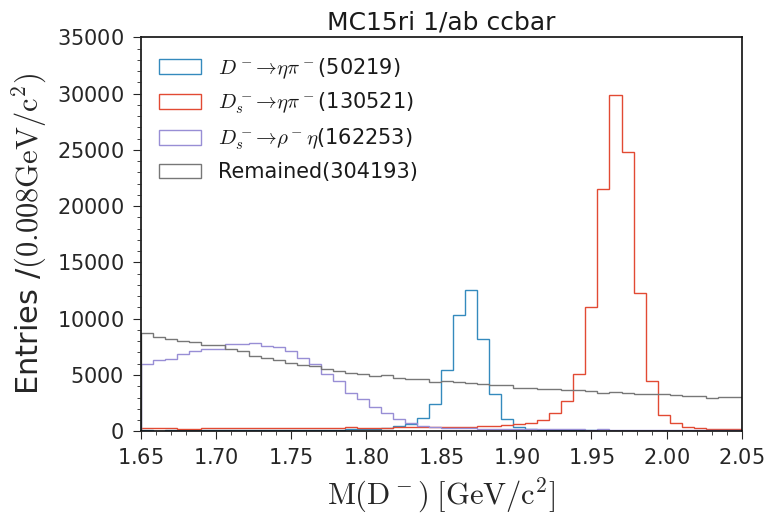

In [43]:
figure_size_inches = (8, 5.5)  # Width, Height
fig = plt.figure(figsize=figure_size_inches)
ax = fig.subplots()
xrange = (1.76,2.05,51)
xrange = (1.65,2.05,51)

xm = np.linspace(*xrange)

cut1 = "Pip_charge==-1 & iCascDcyBrCcP_Dp_0==3"
cut2 = "Pip_charge==-1 & iCascDcyBrCcP_Dsp_0==0"
cut3 = "Pip_charge==-1 & iCascDcyBrCcP_Dsp_0==1"

remained_cut = "Pip_charge==-1 & \
                iCascDcyBrCcP_Dp_0!=3 & \
                iCascDcyBrCcP_Dsp_0!=0 & \
                iCascDcyBrCcP_Dsp_0!=1 "
df = pd_df_test_gg.query(cut1)
df2 = pd_df_test_gg.query(cut2)
df3 = pd_df_test_gg.query(cut3)
df_rest = pd_df_test_gg.query(remained_cut)


# df2 = pd_df_test.query("iCascDcyBrP_Dp_0!=0 & iCascDcyBrCcP_Dp_0!=0")

# df2 = pd_df_test2

N_df = len(df)
N_df2 = len(df2)
N_df3 = len(df3)
N_df_rest = len(df_rest)

plt.hist(df["Dp_M"],bins=xm,histtype='step',label=r'$D^- \to \eta \pi^-$(' + str(N_df) +')');
plt.hist(df2["Dp_M"],bins=xm,histtype='step',label=r'$D^-_s \to \eta \pi^-$(' + str(N_df2) +')');
plt.hist(df3["Dp_M"],bins=xm,histtype='step',label=r'$D^-_s \to \rho^- \eta$(' + str(N_df3) +')');
plt.hist(df_rest["Dp_M"],bins=xm,histtype='step',label=r'Remained(' + str(N_df_rest) +')');

plt.legend(loc="upper right",fontsize=12.5)
ax.set_title(r'MC15ri 1/ab ccbar' )

n, xe = np.histogram(df["Dp_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{M(D^-)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.xlim(xrange[0],xrange[1])
plt.legend(loc="upper left")

plt.tight_layout()

file1_name="/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_generic/gg/topo/MC15ri_etaetapip_gg_tight_v2_Dp_M_cc.png"
plt.savefig(file1_name)
print(N_df+N_df2+N_df3+N_df_rest)

1340141


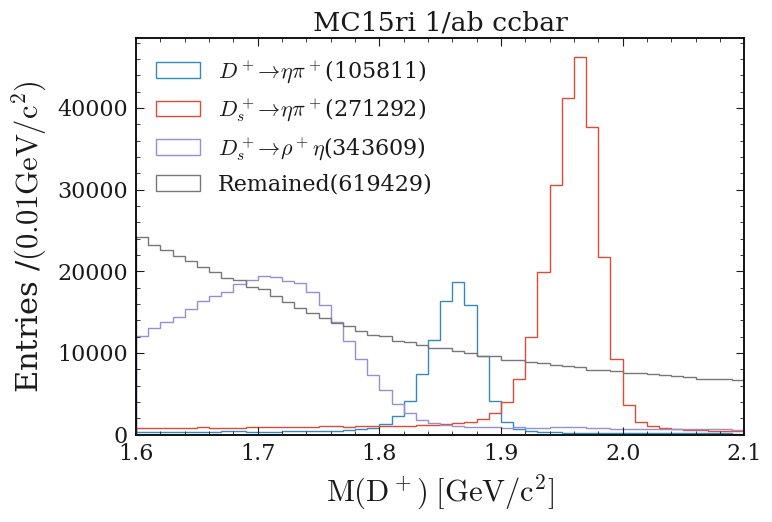

In [54]:
figure_size_inches = (8, 5.5)  # Width, Height
fig = plt.figure(figsize=figure_size_inches)
ax = fig.subplots()
xrange = (1.6,2.1,51)

xm = np.linspace(*xrange)

cut1 = "(iCascDcyBrP_Dp_0==3 | iCascDcyBrCcP_Dp_0==3) & (iCascDcyBrP_Dsp_0!=0 & iCascDcyBrCcP_Dsp_0!=0) & (iCascDcyBrP_Dsp_0!=1 & iCascDcyBrCcP_Dsp_0!=1)"
cut2 = "(iCascDcyBrP_Dsp_0==0 | iCascDcyBrCcP_Dsp_0==0) & (iCascDcyBrP_Dp_0!=3 & iCascDcyBrCcP_Dp_0!=3) "
cut3 = "(iCascDcyBrP_Dsp_0==1 | iCascDcyBrCcP_Dsp_0==1) & (iCascDcyBrP_Dp_0!=3 & iCascDcyBrCcP_Dp_0!=3)"

remained_cut = "iCascDcyBrP_Dp_0!=3 & iCascDcyBrCcP_Dp_0!=3 & \
                iCascDcyBrP_Dsp_0!=0 & iCascDcyBrCcP_Dsp_0!=0 & \
                iCascDcyBrP_Dsp_0!=1 & iCascDcyBrCcP_Dsp_0!=1"
df = pd_df_test_gg.query(cut1)
df2 = pd_df_test_gg.query(cut2)
df3 = pd_df_test_gg.query(cut3)
df_rest = pd_df_test_gg.query(remained_cut)


# df2 = pd_df_test.query("iCascDcyBrP_Dp_0!=0 & iCascDcyBrCcP_Dp_0!=0")

# df2 = pd_df_test2

N_df = len(df)
N_df2 = len(df2)
N_df3 = len(df3)
N_df_rest = len(df_rest)

plt.hist(df["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$(' + str(N_df) +')');
plt.hist(df2["Dp_M"],bins=xm,histtype='step',label=r'$D^+_s \to \eta \pi^+$(' + str(N_df2) +')');
plt.hist(df3["Dp_M"],bins=xm,histtype='step',label=r'$D^+_s \to \rho^+ \eta$(' + str(N_df3) +')');
plt.hist(df_rest["Dp_M"],bins=xm,histtype='step',label=r'Remained(' + str(N_df_rest) +')');

plt.legend(loc="upper right",fontsize=12.5)
ax.set_title(r'MC15ri 1/ab ccbar' )

n, xe = np.histogram(df["Dp_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{M(D^+)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.xlim(xrange[0],xrange[1])
plt.legend(loc="upper left")

plt.tight_layout()

file1_name="/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_generic/gg/topo/MC15ri_etaetapip_gg_tight_v0_looseeta_240317_treefit_BCS_Dp_M.png"
plt.savefig(file1_name)
print(N_df+N_df2+N_df3+N_df_rest)

1340141


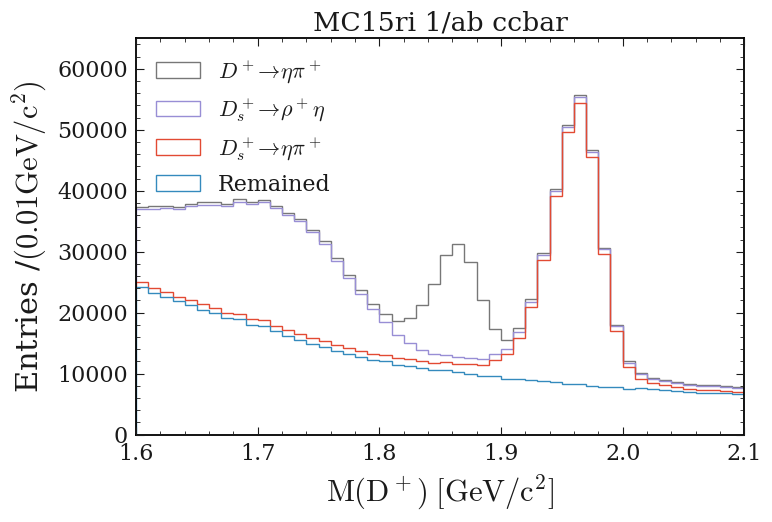

In [60]:
figure_size_inches = (8, 5.5)  # Width, Height
fig = plt.figure(figsize=figure_size_inches)
ax = fig.subplots()
xrange = (1.6, 2.1, 51)

xm = np.linspace(*xrange)

cut1 = "(iCascDcyBrP_Dp_0==3 | iCascDcyBrCcP_Dp_0==3) & (iCascDcyBrP_Dsp_0!=0 & iCascDcyBrCcP_Dsp_0!=0) & (iCascDcyBrP_Dsp_0!=1 & iCascDcyBrCcP_Dsp_0!=1)"
cut2 = "(iCascDcyBrP_Dsp_0==0 | iCascDcyBrCcP_Dsp_0==0) & (iCascDcyBrP_Dp_0!=3 & iCascDcyBrCcP_Dp_0!=3) "
cut3 = "(iCascDcyBrP_Dsp_0==1 | iCascDcyBrCcP_Dsp_0==1) & (iCascDcyBrP_Dp_0!=3 & iCascDcyBrCcP_Dp_0!=3)"

remained_cut = "iCascDcyBrP_Dp_0!=3 & iCascDcyBrCcP_Dp_0!=3 & \
                iCascDcyBrP_Dsp_0!=0 & iCascDcyBrCcP_Dsp_0!=0 & \
                iCascDcyBrP_Dsp_0!=1 & iCascDcyBrCcP_Dsp_0!=1"
df = pd_df_test_gg.query(cut1)
df2 = pd_df_test_gg.query(cut2)
df3 = pd_df_test_gg.query(cut3)
df_rest = pd_df_test_gg.query(remained_cut)

N_df = len(df)
N_df2 = len(df2)
N_df3 = len(df3)
N_df_rest = len(df_rest)

# Plot the stacked histograms
plt.hist([df_rest["Dp_M"], df2["Dp_M"], df3["Dp_M"], df["Dp_M"]], bins=xm, histtype='step', label=['Remained', r'$D^+_s \to \eta \pi^+$', r'$D^+_s \to \rho^+ \eta$', r'$D^+ \to \eta \pi^+$'], stacked=True)

plt.legend(loc="upper right", fontsize=12.5)
ax.set_title(r'MC15ri 1/ab ccbar')

n, xe = np.histogram(df["Dp_M"], bins=50, range=(xrange[0], xrange[1]))

plt.xlabel("$\mathrm{M(D^+)} \; [\mathrm{GeV/c^2}]$")
width = xe[1] - xe[0]
plt.ylabel('Entries' + ' /' + '$(' + ' ' + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$')

plt.xlim(xrange[0], xrange[1])
plt.legend(loc="upper left")

plt.tight_layout()
plt.ylim(0,65000)

file1_name = "/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_generic/gg/topo/MC15ri_etaetapip_gg_tight_v0_looseeta_240317_treefit_BCS_Dp_M_stacked.png"
plt.savefig(file1_name)
print(N_df + N_df2 + N_df3 + N_df_rest)
